# Homework set 2

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 14, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Karin Brinksma 13919938 Dominique Weltevreden 12161160

Run the following cell to import some packages, add additional packages yourself when needed.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

# Exercise 1

## (a) 1 point
Let $A$ be the matrix $\begin{bmatrix} 1 & -1 & \alpha \\ 2 & 2 & 1 \\ 0 & \alpha & -3/2 \end{bmatrix}$. For which values of $\alpha$ is $A$ singular?

YOUR ANSWER HERE

## (b) 1 point
For the largest value of $\alpha$ you found above, find a nonzero vector $b$ such that $Ax = b$ has infinitely many solutions. Explain your answer.

YOUR ANSWER HERE

# Exercise 2

For solving linear systems such as $Ax = b$, it is unnecessary (and often unstable) to compute the inverse $A^{-1}$. Nonetheless, there can be situations where it is useful to compute $A^{-1}$ explicitly. One way to do so is by using the LU-decomposition of $A$.

## (a) 2 points
Write an algorithm to compute $A^{-1}$ for a non-singular matrix $A$ using its LU-decomposition. You can use `scipy.linalg.lu` (which returns an LU-decomposition with _partial pivoting_, i.e., with a permutation matrix $P$) and the other `scipy.linalg.lu_*` functions, but not `scipy.linalg.inv` (or other methods for computing matrix inverses directly).

(Make sure to import the necessary functions/packages.)

In [32]:
def forward_substitution(L, b):
    #source https://johnfoster.pge.utexas.edu/numerical-methods-book/LinearAlgebra_LU.html
    # or alternatively https://ristohinno.medium.com/lu-decomposition-41a3cb0d1ba
    """
    Forward substitution for an LU decompostion; solves Ly = b for y
    """
    #Get number of rows
    n = L.shape[0]
    
    #Allocating space for the solution vector
    y = np.empty(n)
    
    # Here we perform the forward-substitution, initializing  with the first row.
    y[0] = b[0] / L[0, 0]
    
    # Looping over rows in reverse (from the bottom  up), starting with the second to last row, because  the 
    # last row solve was completed in the last step.
    for i in range(1, n):
        y[i] = (b[i] - (L[i,:i] @ y[:i])) / L[i,i]  
        
    return y

def back_substitution(U, y):
    """
    Backward substition for an LU decompostion; solves Ux = y for x
    """
    #source https://johnfoster.pge.utexas.edu/numerical-methods-book/LinearAlgebra_LU.html
    
    #Number of rows
    n = U.shape[0]
    x = np.zeros(n)
    
    # Here we perform the back-substitution, initializing with the last row.
    x[-1] = y[-1] / U[-1, -1]
    
    # Looping over rows in reverse (from the bottom up), starting with the second to last row, because the 
    # last row solve was completed in the last step.
    for i in range(n - 2, -1, -1):
        x[i] = (y[i] - (U[i,i:] @ x[i:])) / U[i,i]
    return x

def invert(A):
    #source: https://johnfoster.pge.utexas.edu/numerical-methods-book/LinearAlgebra_LU.html
    
    # Check if the determinant is not 0, i.e. the matrix is not invertible
    assert (linalg.det(A))
    
    # Find n based on A
    n = A.shape[0]
    
    # b will be rows of the identity matrix, as you're inverting it
    B = np.eye(n)
    
    # Initialize the inverted A matrix 
    A_inv = np.empty((n, n))
    
    # Perform LU decomposition
    P, L, U = linalg.lu(A)
    
    # Get one row of the identity matrix to use as b
    for i in range(n):
        
        # Get y from forward substitution
        y = forward_substitution(L, (P @ (B[i, :])))
        
        # Add this solution for x from backward substitution as a column to the inverse matrix
        #print(back_substitution(U, y))
        A_inv[:, i] = back_substitution(U, y)
        
    return A_inv

A_matrix = np.array([[1, 5, 1], [2, 8, 2], [8, 3, 3]])

inv = invert(A_matrix)
print(inv)

actual_inv = linalg.inv(A_matrix)
print(actual_inv)
equal = np.allclose(inv, actual_inv)
print(equal)


[[ 1.8 -1.2  0.2]
 [ 1.  -0.5  0. ]
 [-5.8  3.7 -0.2]]
[[ 1.80000000e+00 -1.20000000e+00  2.00000000e-01]
 [ 1.00000000e+00 -5.00000000e-01  1.38777878e-17]
 [-5.80000000e+00  3.70000000e+00 -2.00000000e-01]]
True


## (b) 1 point
What is the computational complexity of your algorithm, given that the input matrix has size $n \times n$?
Give a short calculation/explanation for your answer.

The computational complexity of this algorithm where a matrix is explicitly inverted using LU decomposition is, in Big O notation, $\mathcal{O}(n^3)$.

The algorithm requires an LU decomposition and a loop of n complexity for all the columns of the identity matrix of size n. In the loop, forward and backward substitutions, which have a complexity of $n^2$. This is because there is a loop over n and within this loop a dot product is calculated, with a complexity of n. This would mean $2n^2$ for both operations, within a loop of n; leading to $2n^3$. This reduces to $n^3$ as n approaches infinity.

# Exercise 3

## (a) (2 points) 
What happens when Gaussian elimination with partial pivoting is used on a matrix of the following form?
$$
  \begin{bmatrix}
     1 &  0 &  0 &  0 &  1 \\
    -1 &  1 &  0 &  0 &  1 \\
    -1 & -1 &  1 &  0 &  1 \\
    -1 & -1 & -1 &  1 &  1 \\
    -1 & -1 & -1 & -1 &  1 
  \end{bmatrix}
$$
Do the entries of the transformed matrix grow? What happens if complete pivoting is used instead? (Note that part (a) does not require a computer.)


YOUR ANSWER HERE

## (b) (2 points)
Write a method that generates a matrix of the form of part (a) of size $n \times n$ for any $n$. Use a library routine for Gaussian elimination with partial pivoting to solve various sizes of linear systems of this form, using right-hand-side vectors chosen so that the solution is known. Try for example the case where the true solution is a vector of uniformly distributed random numbers between 0 and 1. How do the error, residual, and condition number behave as the systems become larger? Comment on the stability (see chapter 1) of Gaussian elimination with partial pivoting in this case.
/
N.B. This is an artificially contrived system that does not reflect the behavior of Gaussian elimination in realistic examples.

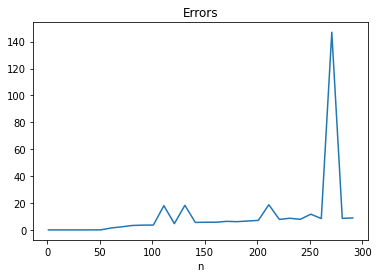

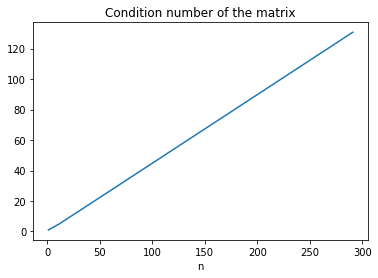

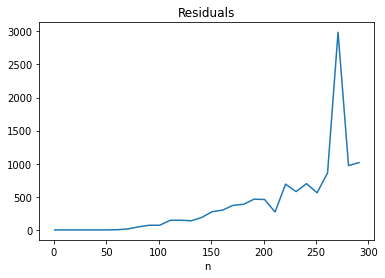

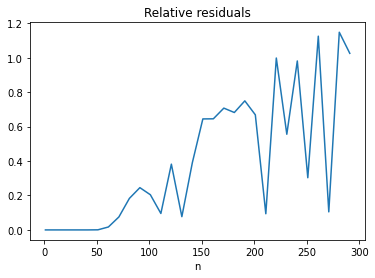

In [108]:
def create_matrix(n):
    A = np.ones((n,n))
    
    # Get lower triangular matrix with -1
    A = np.tril(A, -1) * -1
           
    A += np.identity(n) 
    
    # Set last column to ones           
    A[:, -1] = 1
    #print(A)
    return A

def generate_x(n):
    return np.random.rand(n, 1)

def get_b(A, x):
    return A @ x

def get_lu_x(A, b):
    """
    LU decomposition with partial pivoting
    """
    lu = linalg.lu_factor(A)
    x = linalg.lu_solve(lu, b)
    return x


n_options = np.arange(1, 300, 10)
errors = []
condition_nrs = []
residuals = []
rel_ress = []

for n_chosen in n_options:
    
    # Generate matrix
    matrix = create_matrix(n_chosen)
    
    # Generate a given x
    true_x = generate_x(n_chosen)
    
    # Calculate b with this x
    true_b = get_b(matrix, true_x)
    
    # Approximate x using this b and the Gaussian elimination
    x_hat = get_lu_x(matrix, true_b)
    
    # Calculate error
    error = np.linalg.norm(x_hat - true_x)

    errors.append(error)
    
    # Calculate residuals by using the x_hat to calculate the solution b
    b_hat = get_b(matrix, x_hat)
    
    residual = np.linalg.norm(b_hat - true_b)

    residuals.append(residual)
    
    # Relative residual
    rel_res = residual / (np.linalg.norm(matrix) * np.linalg.norm(x_hat))
    
    rel_ress.append(rel_res)
    
    # Calculate condition number for this matrix
    cond = np.linalg.cond(matrix)
    
    condition_nrs.append(cond)
    

plt.plot(n_options, errors, label=r"double")
plt.title("Errors")
plt.xlabel("n")
plt.show()
plt.title("Condition number of the matrix")
plt.plot(n_options, condition_nrs)
plt.xlabel("n")
plt.show()
plt.plot(n_options, residuals)
plt.title("Residuals")
plt.xlabel("n")
plt.show()
plt.plot(n_options, rel_ress)
plt.title("Relative residuals")
plt.xlabel("n")
plt.show()




As the n increases, so does the condition number of the matrix; with a higher condition number, the system is more sensitive to relatively small disturbances in the input.
A relatively large residual implies a large backward error in the matrix, which means an unstable algorithm; the relative residual varies somewhat, but does not seems to be particularly small and increases as the n increases. 